# Prática 02: Convolução (Filtragem)

* Preparação do ambiente

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Questão 01:
Gere um sinal que é a soma de duas funções seno com frequências angulares iguais a 
0,1π e 0,8π; amplitudes iguais a 1 e 1,2; e fases iniciais iguais a π/3 e π/4, 
respectivamente, ou seja:
 x[n] = sen(0,1.π.n + π/3) + 1,2.sen(0,8.π.n + π/4). 



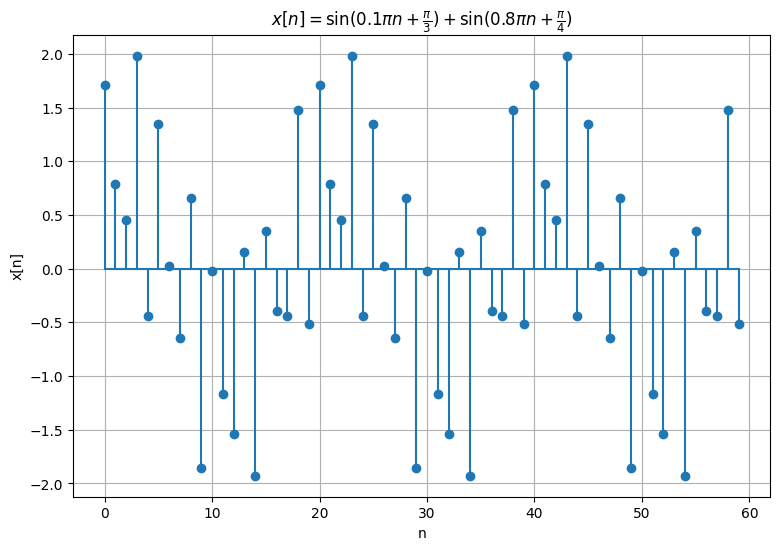

In [3]:
#Definindo as amostras e criando uma variável para o número pi
n_samples = np.arange(0,60)
pi = np.pi

#definindo as duas funções seno
sen1 = 1 * np.sin(0.1 * pi * n_samples + pi/3)
sen2 = 1.2 * np.sin(0.8 * pi * n_samples + pi/4)

#função x definida na questão
def x(n) -> list[float]:
    return sen1 + sen2

x_n = x(n_samples)

#Plotando o gráfico
plt.figure(figsize=(9,6))
plt.stem(n_samples, x_n, basefmt="")

#Estilizações
plt.title(r"$x[n]= \sin(0.1 \pi n + \frac{\pi}{3}) + \sin(0.8 \pi n + \frac{\pi}{4})$")
plt.xlabel("n")
plt.ylabel("x[n]")

plt.grid(True)
plt.show()


### Questão 02:
Gere uma resposta ao impulso de um sistema LIT dada por: 
h[n] = sen(0,45 π (n-20))/(π (n-20)), para 0<= n <= 40, para n diferente de 20,
 h[n] = 0,45, para n=20.
 h[n] = 0, caso contrário,
 Gere o gráfico desta resposta ao impulso [sin,figure,stem].

[]

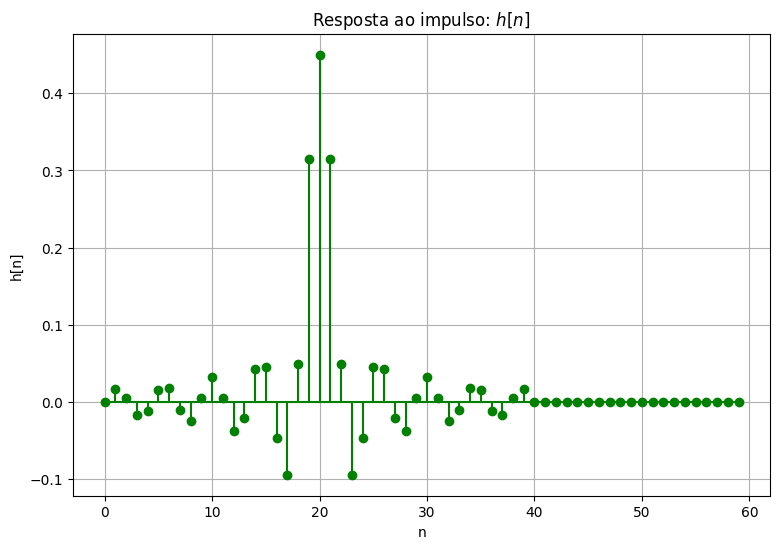

In [4]:
def h(n)->float:
    if n == 20:
        return 0.45
    elif 0 <= n <= 40:
        return np.sin(0.45 * pi * (n-20)) / (pi * (n-20))
    return 0

h_n = [h(n) for n in n_samples]

#Plotando o gráfico
plt.figure(figsize=(9,6))
plt.stem(n_samples, h_n, basefmt="g", linefmt="g")

#Estilizações
plt.title("Resposta ao impulso: $h[n]$")
plt.xlabel("n")
plt.ylabel("h[n]")

plt.grid(True)
plt.plot()



### Questão 3:
Filtre o sinal de questão 1 usando a resposta ao impulso gerada na questão 2. Gere o 
gráfico deste sinal filtrado [conv,figure,plot]. 



#### Função convolução
A Seguir eu implemento a convolução discreta em uma função do python seguindo a fórmula da convolução discreta que é dada por:
$$
y[n] = (x * h)[n] = \sum_{k=-\infty}^{\infty} x[k] \cdot h[n-k]
$$



In [5]:
def convolution(x, h, n_samples):
    
    #crio um vetor que será a saída da convolução
    y = np.zeros(len(x))

    #Aplico a fórmula da convolução ponto a ponto (Em cada índice dos dois vetores)
    for n in n_samples:
        result = 0
        for k in n_samples:
            result += x[k] * h[n-k]
        y[n] = result

    return y

[]

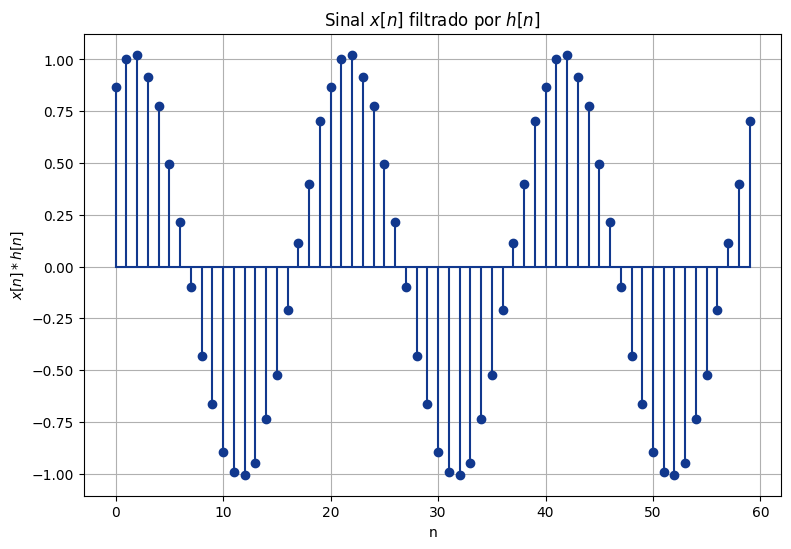

In [6]:
def filter(x, h):
    return np.convolve(x, h, mode="same")

#impulso teste
v = np.zeros(60)
v[0] = 1

#filteredSignal = filter(x_n, h_n)
filteredSignal = convolution(x_n, h_n, n_samples)

#Plotando o gráfico
plt.figure(figsize=(9,6))
plt.stem(n_samples, filteredSignal, linefmt="#11388e", basefmt="#11388e")

#Estilizações
plt.title("Sinal $x[n]$ filtrado por $h[n]$")
plt.xlabel("n")
plt.ylabel("$x[n] * h[n]$")

plt.grid(True)
plt.plot()

#### Questão 4: 
Escreva o que você observou na Questão 3.


#### Filtro da função x[n]
Primeiramente, a convolução do sinal x[n] com h[n] resultou em uma suavização do x[n], mostrando que essa convolução serviu como um filtro.  
Mas qual é o tipo de filtro de h[n]? 
Pesquisando com meu amigo chat gpt, ele me informou que esse sinal h[n]:

$$
h[n] = 
\begin{cases}
\frac{\sin(0,45 \pi (n-20))}{\pi (n-20)}, & \text{para } 0 \leq n \leq 40, \ n \neq 20 \\
0,45, & \text{para } n = 20 \\
0, & \text{caso contrário}
\end{cases}
$$

tem uma estrutura parecida com o a função Sinc, definida como:

$$
\text{sinc}(x) = \frac{\sin(\pi x)}{\pi x}
$$

Ele me apresentou algumas características da função Sinc, sendo elas:
- Possui um pico
- Oscila entre valores positivos e negativos ao redor do pico
- É simétrica
- Possui um decaimento

Todas essas características podem ser observadas no gráfico da função h[n]:


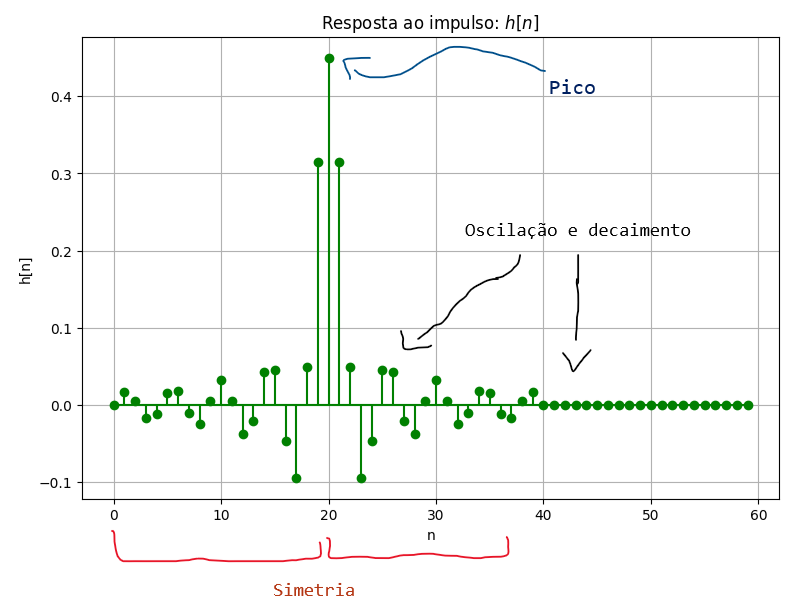

<br>
Sendo assim, como a função Sinc é utilizada em filtros passas baixas, conclui que o h[n] na verdade se comportou como um filtro de passa-baixa no sinal x[n], atenuando as frequências mais altas.